In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn import tree, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from pandas import DataFrame
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

Here I read the dataset using pandas:

In [2]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")

In [3]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data["RiskLevel"].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

As there is a categorical column in our dataset, I change its data to numerical using LabelEncoder:

In [5]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'RiskLevel'. 
data['RiskLevel']= label_encoder.fit_transform(data['RiskLevel']) 
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [6]:
data["RiskLevel"].value_counts()

1    406
2    336
0    272
Name: RiskLevel, dtype: int64

In [7]:
y = data["RiskLevel"]
X = data[["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]]

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle = True)

**standard Scaler:**\
I tried using scaler but it ended up decreasing the accuracy.

**Model Selection:**\
For each model I, first, tune the parameters using k fold cross validation ,and then I fit the model with those parameters and, using the model I trained, I predict my test set.

**Desicion Tree:**

In [9]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=18)

DT_result = cross_val_score(clf, X_train, y_train).mean()

print('accuracy:', DT_result.mean()*100)

accuracy: 76.44491059834182



| random state | max depth | Accuracy |
| :-: | :-: | :-: |
| 2 | 10 | 73.75
| 0 | 10 | 73.05
| 0 | 20 | 75.88
| 0 | 30 | 76.44
| 0 | 18 | 76.30

Predicting train set:

In [10]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
accuracy_score(y_train, y_predict)

0.92524682651622

predicting the test set:

In [11]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.819672131147541

**Confusion matrix:**\
A confusion matrix M is such that M<sub>ij</sub> is equal to the number of observations known to be in group i and predicted to be in group j.

In [12]:
confusion_matrix(y_test, y_predict)

array([[ 78,   3,   5],
       [  2, 106,  29],
       [  9,   7,  66]])

**KNN:**

In [13]:
clf2 = KNeighborsClassifier(n_neighbors=1)
KNN_result = cross_val_score(clf2, X_train, y_train).mean()

print('accuracy:', KNN_result.mean()*100)

accuracy: 77.0102886824493


| n_neighbors | Accuracy |
| :-: |  :-: |
| 5 |  64.88
| 3 |  66.00
| 2  | 70.2
| 1  | 76.16

predicting train set:

In [14]:
clf2.fit(X_train, y_train)
y_predict = clf2.predict(X_train)
accuracy_score(y_train, y_predict)

0.9055007052186178

predicting the test set:

In [15]:
clf2.fit(X_train, y_train)
y_predict = clf2.predict(X_test)
accuracy_score(y_test, y_predict)

0.8065573770491803

Confusion Matrix:

In [16]:
confusion_matrix(y_test, y_predict)

array([[ 70,   9,   7],
       [  3, 109,  25],
       [  4,  11,  67]])

**SVM:**

In [17]:
clf = svm.SVC(decision_function_shape='ovo')

SVM1_result = cross_val_score(clf, X_train, y_train).mean()

print('accuracy:', SVM1_result.mean()*100)

accuracy: 53.31135750674258


In [18]:
clf3 = svm.SVC(kernel='poly', degree=6, C=3)
SVM2_result = cross_val_score(clf3, X_train, y_train).mean()

print('accuracy:', SVM2_result.mean()*100)

accuracy: 69.11097792428328


| c |  degree | Accuracy |
| :- |-: | :-: |
| 2 | 2 |65.02
| 2 | 4 |65.48
| 2 | 5 |66.01
| 2 | 7 |67.78
| 2 | 8 |68.39
| 2 | 9 |68.64
| 3 | 8 |68.82
| 4 | 8 |69.12
| 5 | 8 |69.02
| 3 | 6 |69.1

predicting train set:

In [19]:
clf3.fit(X_train, y_train)
y_predict = clf3.predict(X_train)
accuracy_score(y_train, y_predict)

0.7165021156558533

predicting the test set:

In [20]:
clf3.fit(X_train, y_train)
y_predict = clf3.predict(X_test)
accuracy_score(y_test, y_predict)

0.7377049180327869

Confusion Matrix:

In [21]:
confusion_matrix(y_test, y_predict)

array([[ 74,   3,   9],
       [  2, 121,  14],
       [  7,  45,  30]])

**Random Forest:**

In [22]:
clf4 = RandomForestClassifier(max_depth=15, random_state=1, n_estimators=100)

result = cross_val_score(clf4, X_train, y_train).mean()

print('accuracy:', result.mean()*100)

accuracy: 77.15113375287184


| max depth | random state | n estimators | Accuracy |
| :-: | :-: | :-: |:-: |
| 5 | 0 | 20  |72.07
| 3 | 0 | 30  |67.5
| 8 | 0 | 1 |67.83
| 15 | 1 | 100 |77.1
| 15 | 0 | 100 |78.1

predicting train set:

In [23]:
clf4.fit(X_train, y_train)
y_predict = clf4.predict(X_train)
accuracy_score(y_train, y_predict)

0.92524682651622

predicting the test set:

In [24]:
clf4.fit(X_train, y_train)
y_predict = clf4.predict(X_test)
accuracy_score(y_test, y_predict)

0.8524590163934426

Confusion Matrix:

In [25]:
confusion_matrix(y_test, y_predict)

array([[ 75,   4,   7],
       [  1, 117,  19],
       [  6,   8,  68]])

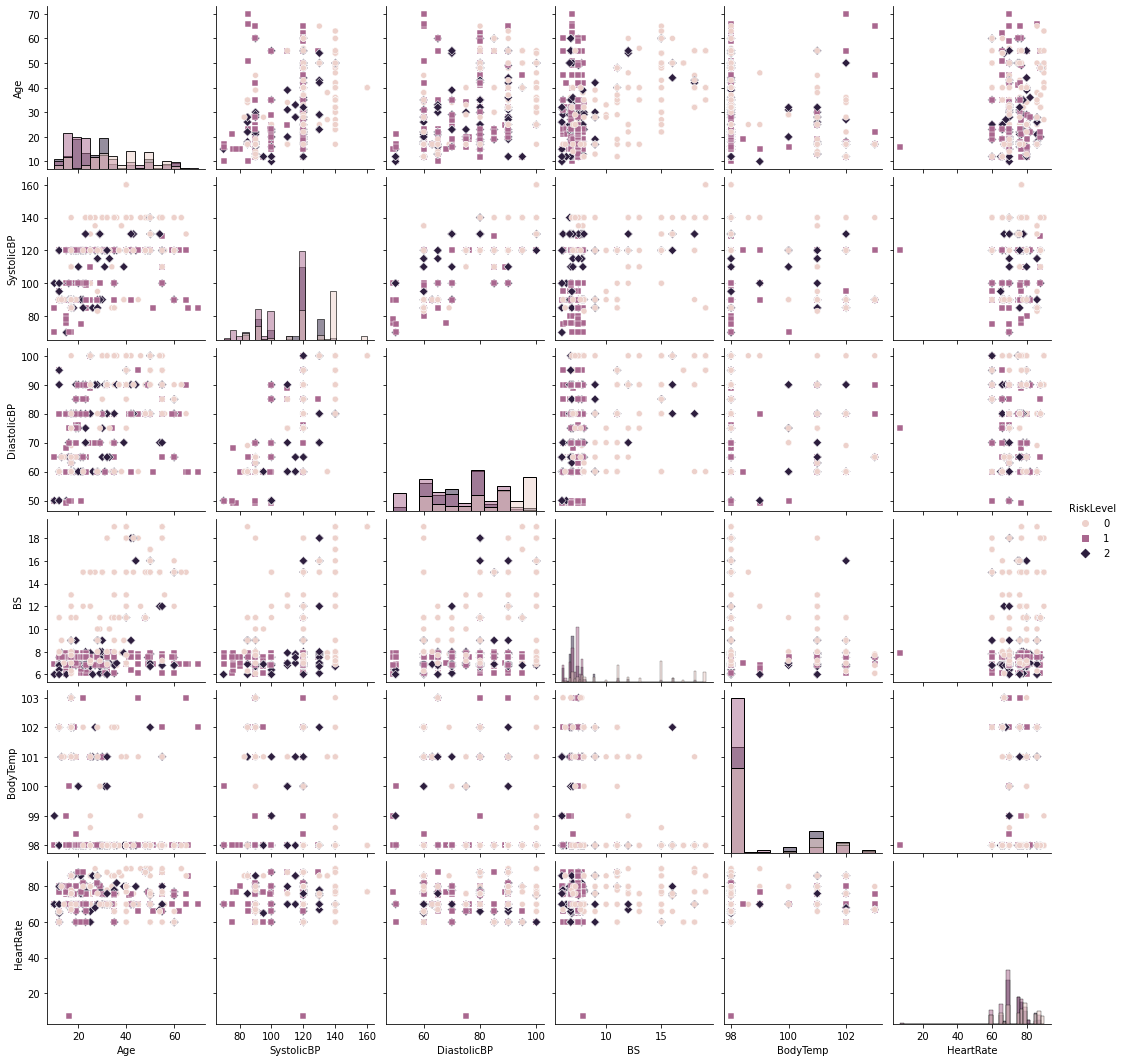

In [26]:
sns.pairplot(data,hue="RiskLevel", diag_kind="hist",  markers=["o", "s", "D"])

**Overall Results:**

| model |cross validation | test | train |
| :-: |:-: | :-: | :-: |
| Desicion tree | 76| 81 | 92
| KNN | 77 | 80 |90
| SVM | 69 | 73 |71
| Random forrest | 77 | 85 | 92


As you can see i got the best accuracy with random forrest.\
But due to the difference between test and train accuracy in this model, I can say that it is overfitting.\